In [2]:
import os
import sys
import glob
import argparse
import threading
import six.moves.queue as Queue # pylint: disable=import-error
import traceback
import numpy as np
import tensorflow as tf
import PIL.Image
import pickle


In [8]:
import matplotlib.pyplot as plt

In [15]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [4]:
image_dir = "landscapes"

In [20]:
class Landscape:
    def __init__(self,filepath,style,labels):
        self.filepath = filepath
        self.style = style
        self.labels = labels

In [29]:
print('Loading images from "%s"' % image_dir)
image_filenames = sorted(glob.glob(os.path.join(image_dir, '*')))
if len(image_filenames) == 0:
    error('No input images found')

img = PIL.Image.open(image_filenames[0])



Loading images from "landscapes"


In [6]:
labels = []
labels_dict = {}
labels_list = pickle.load(open("labels.p", "rb"))
for label in labels_list:
    labels_dict[label[0]] = label[1]

In [31]:
image_filenames = [x.rsplit("\\")[-1] for x in image_filenames]
print(image_filenames[0])

100.jpg


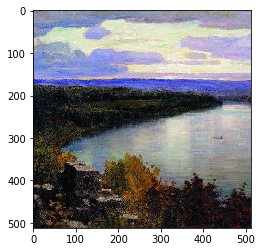

In [32]:
plt.imshow(PIL.Image.open('landscapes/'+image_filenames[1]))

In [17]:
model = VGG16(weights='imagenet')

40960/35363 [==================================] - 0s 1us/step
Predicted: [('n04033995', 'quilt', 0.16472648), ('n04606251', 'wreck', 0.067509614), ('n02859443', 'boathouse', 0.042005893)]


In [34]:
img_path = image_filenames[1]
img = image.load_img('landscapes/' + img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n09332890', 'lakeside', 0.26140416), ('n09288635', 'geyser', 0.18804064), ('n09428293', 'seashore', 0.1321577)]


In [22]:
landscapes_stats = []

In [54]:
for img_path in image_filenames:
    #img_path = image_filenames[i]
    img = image.load_img('landscapes/' + img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    landscapes_stats.append(Landscape(img_path,
                                      labels_dict[img_path],
                                      decode_predictions(preds, top=3)))


In [56]:
pickle.dump( landscapes_stats, open( "landscape_stats.p", "wb" ) )

In [57]:
count_labels = []
for land in landscapes_stats:
    for label in land.labels[0]:
        count_labels.append(label[1])

In [58]:
from collections import Counter


In [59]:
Counter(count_labels).most_common(10)

[('valley', 2301),
 ('cliff', 2172),
 ('lakeside', 1682),
 ('geyser', 1103),
 ('castle', 1094),
 ('volcano', 893),
 ('alp', 832),
 ('wreck', 779),
 ('barn', 701),
 ('promontory', 650)]

In [61]:
countlabels = {}
countlabels[0]  = []
countlabels[1]  = []
countlabels[2]  = []
countlabels[3]  = []


for land in landscapes_stats:
    for label in land.labels[0]:
        countlabels[land.style].append(label[1])

In [64]:
names = ["Romanticism", "Impressionism", "Realism", "Post-Impressionism"]

In [65]:
for i in range(len(countlabels)):
    print(names[i])
    print(Counter(countlabels[i]).most_common(10))

Romanticism
[('valley', 447), ('cliff', 446), ('volcano', 305), ('geyser', 291), ('lakeside', 226), ('castle', 208), ('alp', 173), ('promontory', 146), ('wreck', 133), ('seashore', 119)]
Impressionism
[('valley', 934), ('cliff', 819), ('lakeside', 742), ('castle', 426), ('geyser', 345), ('alp', 336), ('wreck', 307), ('barn', 295), ('stone_wall', 268), ('volcano', 258)]
Realism
[('valley', 651), ('cliff', 593), ('lakeside', 504), ('geyser', 433), ('volcano', 276), ('castle', 260), ('barn', 237), ('wreck', 232), ('alp', 204), ('megalith', 170)]
Post-Impressionism
[('cliff', 314), ('valley', 269), ('lakeside', 210), ('castle', 200), ('jigsaw_puzzle', 180), ('stone_wall', 137), ('alp', 119), ('wreck', 107), ('fountain', 96), ('seashore', 95)]


In [72]:
image_filenames = sorted(glob.glob(("../results/vm/landscapes/images/*")))
if len(image_filenames) == 0:
    print('No input images found')

In [73]:
image_filenames = [x.rsplit("\\")[-1] for x in image_filenames]
print(image_filenames[0])

img_0.png


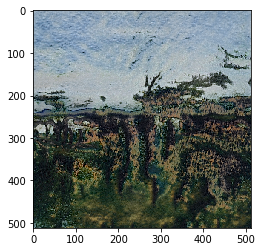

In [75]:
plt.imshow(PIL.Image.open('../results/vm/landscapes/images/'+image_filenames[0]))

In [77]:
generated_landscapes_stats = []
for img_path in image_filenames:
    #img_path = image_filenames[i]
    img = image.load_img('../results/vm/landscapes/images/' + img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    generated_landscapes_stats.append(Landscape(img_path, 1,decode_predictions(preds, top=3)))


In [78]:
generated_count_labels = []
for land in generated_landscapes_stats:
    for label in land.labels[0]:
        generated_count_labels.append(label[1])

In [79]:
Counter(generated_count_labels).most_common(10)

[('lakeside', 43),
 ('cliff', 25),
 ('wreck', 22),
 ('seashore', 21),
 ('valley', 21),
 ('stone_wall', 18),
 ('geyser', 15),
 ('castle', 15),
 ('sandbar', 11),
 ('maze', 10)]

In [81]:
generated_landscapes_stats[0].labels

[[('n02687172', 'aircraft_carrier', 0.15147355),
  ('n09332890', 'lakeside', 0.14645639),
  ('n04606251', 'wreck', 0.13207111)]]